In [7]:
import becquerel as bq
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from bs4 import BeautifulSoup
import utils
import scipy.interpolate as interpolate
import lmfit



/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/rebin.py:57: RebinWarning: The last input edge is smaller than the last output edge, zeros will padded on the right side of the new spectrum
  warnings.warn(
/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/spectrum.py:837: SpectrumWarning: Subtraction of counts-based specta, spectra have been converted to CPS
  warnings.warn(


<Axes: xlabel='Energy [keV]', ylabel='Countrate [1/s]'>

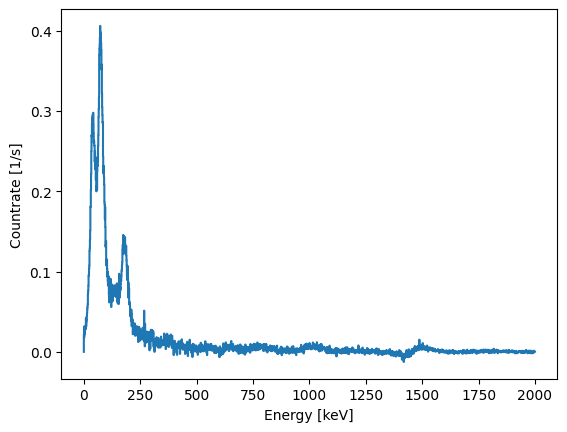

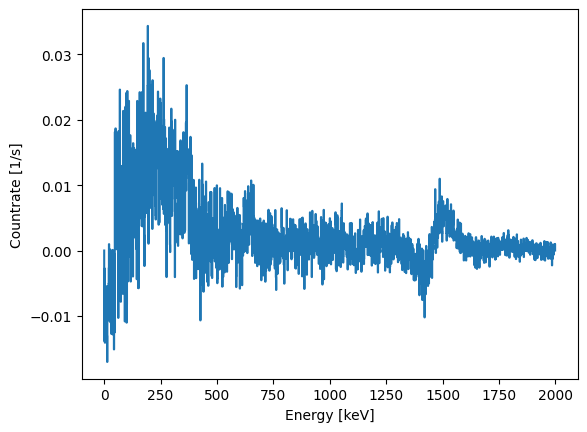

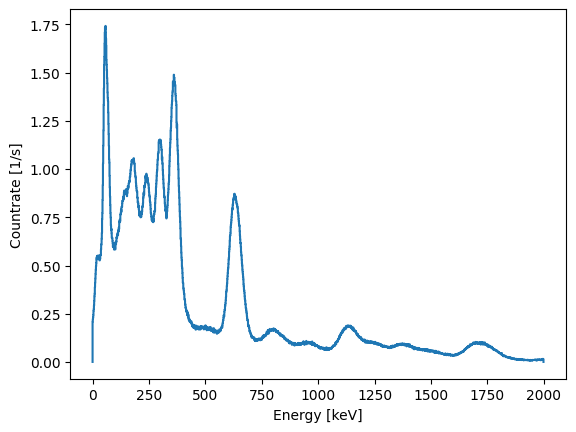

In [72]:
# bottle_1 = utils.get_corrected_spectrum("serial_2275411")
# bottle_2 = utils.get_corrected_spectrum("serial_2275412")
# bottle_3 = utils.get_corrected_spectrum("serial_2339311")
# bottle_4 = utils.get_corrected_spectrum("serial_2339312")
# bottle_5 = utils.get_corrected_spectrum("serial_2339314")

# bottle_1.plot()
# bottle_2.plot()
# bottle_3.plot()
# bottle_4.plot()
# bottle_5.plot()

# soil_1 = utils.get_corrected_spectrum("soil_tailing11")
# soil_1.plot()

# soil_1_uncorrect = utils.get_uncorrected_spectrum("soil_tailing11")
# soil_1_uncorrect.plot()

juicer = utils.get_corrected_spectrum("antique_juicer")
juicer.plot()

mug = utils.get_corrected_spectrum("antique_mug")
mug.plot()
# mug_uncorrect = utils.get_uncorrected_spectrum("antique_mug")
# mug_uncorrect.plot()

watch = utils.get_corrected_spectrum("antique_watch")
watch.plot()

# soil_low = utils.get_corrected_spectrum("soil_tailing11")
# soil_medium = utils.get_corrected_spectrum("soil_tailing3")
# soil_high = utils.get_corrected_spectrum("soil_openpit")




In [ ]:
print("Start geometric efficiency calibration...")
calibration_names = ["2275411", "2275412",
                        "2339312", "2339314",
                        "2339311"]
manifest = utils.read_manifest()  # dict of bottle info
efficiencies = utils.read_efficiencies()  # dict of efficiencies

bottle_efficiencies = {}
# read in calibration bottles
for name in calibration_names:
    # note that this uses 20_000 bins from 0 to 2_000 keV
    spectrum = utils.get_corrected_spectrum(f'serial_{name}')

    # get cps under specific peaks: 662, 1173, 1333
    bottle_efficiencies[name] = {}
    peaks = [60, 662, 1173, 1333]
    gamma_info = manifest[name]['gamma_info']
    for peak in peaks:
        cps, _ = utils.get_cps_peak(spectrum, peak)
        if peak == 60:
            cps *= 0.36
        overall_efficiency = cps / gamma_info[gamma_info['energy'] == peak]['activity_cps'].values[0]
        # intrinsic_efficiency = efficiencies[peak]
        geometry_efficiency = overall_efficiency #/ intrinsic_efficiency
        bottle_efficiencies[name][peak] = geometry_efficiency
print(bottle_efficiencies)

# energy_splines = {}
energy_points = {}
# setup spline interpolation with volumes and densities resulting in efficiencies per energy
volumes = [manifest[name]['volume'] for name in calibration_names]
densities = [manifest[name]['density'] for name in calibration_names]
efficiencies = [bottle_efficiencies[name][662] for name in calibration_names]
# energy_splines[662] = interpolate.bisplrep(volumes, densities, efficiencies)
energy_points[662] = {"volumes": volumes, "densities": densities, "efficiencies": efficiencies}

volumes = [manifest[name]['volume'] for name in calibration_names]
densities = [manifest[name]['density'] for name in calibration_names]
efficiencies = [bottle_efficiencies[name][1173] for name in calibration_names]
# energy_splines[1173] = interpolate.bisplrep(volumes, densities, efficiencies)
energy_points[1173] = {"volumes": volumes, "densities": densities, "efficiencies": efficiencies}

volumes = [manifest[name]['volume'] for name in calibration_names]
densities = [manifest[name]['density'] for name in calibration_names]
efficiencies = [bottle_efficiencies[name][1333] for name in calibration_names]
# energy_splines[1333] = interpolate.bisplrep(volumes, densities, efficiencies)
energy_points[1333] = {"volumes": volumes, "densities": densities, "efficiencies": efficiencies}

Start geometric efficiency calibration...


/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/rebin.py:57: RebinWarning: The last input edge is smaller than the last output edge, zeros will padded on the right side of the new spectrum
  warnings.warn(
/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/spectrum.py:837: SpectrumWarning: Subtraction of counts-based specta, spectra have been converted to CPS
  warnings.warn(
/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/fitting.py:987: FittingWarning: `lmfit` error estimates are unreliable. `minuit` is recommended where possible
  warnings.warn(
/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/fitting.py:987: FittingWarning: `lmfit` error estimates are unreliable. `minuit` is recommended where possible
  warnings.warn(
/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/fitting.py:987: FittingWarnin

{'2275411': {60: np.float64(0.027402993665809734), 662: np.float64(0.025007564546899525), 1173: np.float64(0.011957817376658606), 1333: np.float64(0.011251155491749678)}, '2275412': {60: np.float64(0.01707369957285282), 662: np.float64(0.026755380822728974), 1173: np.float64(0.012956458279961173), 1333: np.float64(0.012227401020471526)}, '2339312': {60: np.float64(0.01336492972135464), 662: np.float64(0.02701949388531608), 1173: np.float64(0.013949984374012502), 1333: np.float64(0.013480328245088189)}, '2339314': {60: np.float64(0.0186081861662128), 662: np.float64(0.025255862555130848), 1173: np.float64(0.012890268168171706), 1333: np.float64(0.011971972422376988)}, '2339311': {60: np.float64(0.01634239874559264), 662: np.float64(0.026425818470015926), 1173: np.float64(0.013602654571341785), 1333: np.float64(0.012984466700077177)}}


/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/fitting.py:987: FittingWarning: `lmfit` error estimates are unreliable. `minuit` is recommended where possible
  warnings.warn(
/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/fitting.py:987: FittingWarning: `lmfit` error estimates are unreliable. `minuit` is recommended where possible
  warnings.warn(
/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/fitting.py:987: FittingWarning: `lmfit` error estimates are unreliable. `minuit` is recommended where possible
  warnings.warn(


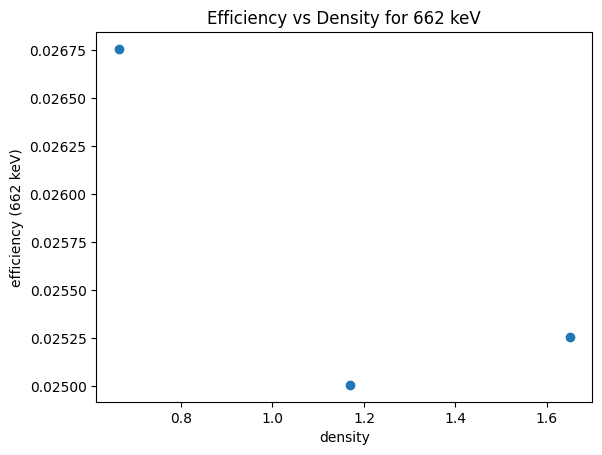

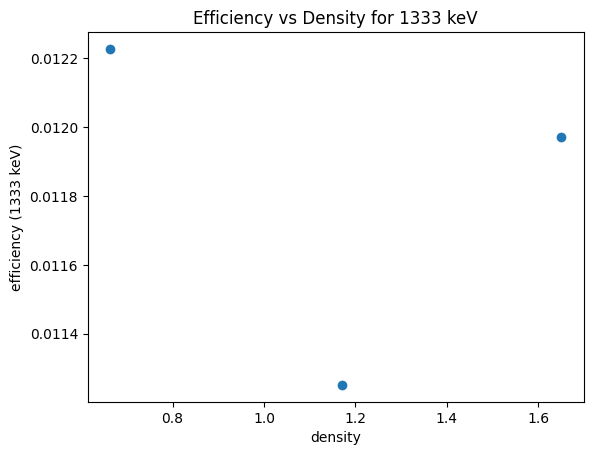

In [43]:
# plot efficiencies vs density for 662 keV for bottles other than 2339312
efficiencies_662 = [bottle_efficiencies[name][662] for name in calibration_names if name not in ['2339311', '2339312']]
densities = [manifest[name]['density'] for name in calibration_names if name not in ['2339311', '2339312']]
# efficiencies_662 = [bottle_efficiencies[name][662] for name in calibration_names]
# densities = [manifest[name]['density'] for name in calibration_names]

plt.scatter(densities, efficiencies_662)
plt.xlabel('density')
plt.ylabel('efficiency (662 keV)')
plt.title('Efficiency vs Density for 662 keV')
plt.show()

efficiencies_1333 = [bottle_efficiencies[name][1333] for name in calibration_names if name not in ['2339311', '2339312']]
densities = [manifest[name]['density'] for name in calibration_names if name not in ['2339311', '2339312']]

plt.scatter(densities, efficiencies_1333)
plt.xlabel('density')
plt.ylabel('efficiency (1333 keV)')
plt.title('Efficiency vs Density for 1333 keV')
plt.show()

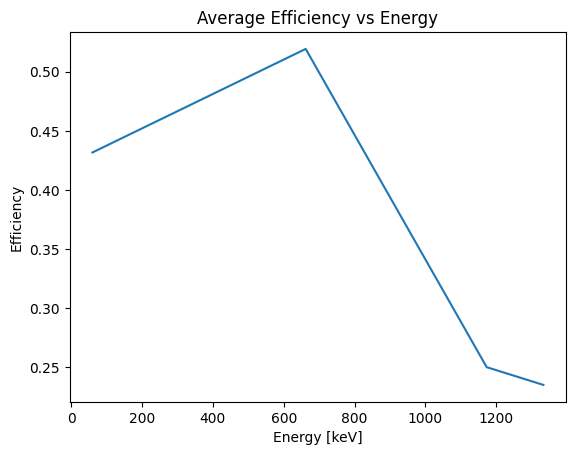

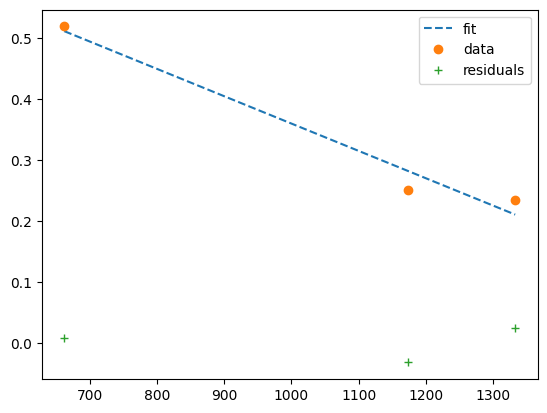

In [37]:
efficiency_60 = np.mean([bottle_efficiencies[name][60] for name in calibration_names])
efficiency_662 = np.mean([bottle_efficiencies[name][662] for name in calibration_names])
efficiency_1173 = np.mean([bottle_efficiencies[name][1173] for name in calibration_names])
efficiency_1333 = np.mean([bottle_efficiencies[name][1333] for name in calibration_names])

plt.plot([60, 662, 1173, 1333], [efficiency_60, efficiency_662, efficiency_1173, efficiency_1333])
plt.xlabel('Energy [keV]')
plt.ylabel('Efficiency')
plt.title('Average Efficiency vs Energy')
plt.show()

x = np.array([662, 1173, 1333])
y = np.array([efficiency_662, efficiency_1173, efficiency_1333])
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

xp = np.linspace(x[0],x[-1],100)
plt.plot(xp,p(xp),"--", label='fit')
plt.plot(x,y,'o', label='data')
plt.plot(x, y - p(x), '+', label='residuals')
plt.legend()
plt.show()

def efficieny_from_energy(x):
    if x < 662:
        return p(662)
    else:
        return p(x)



/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/rebin.py:57: RebinWarning: The last input edge is smaller than the last output edge, zeros will padded on the right side of the new spectrum
  warnings.warn(
/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/spectrum.py:837: SpectrumWarning: Subtraction of counts-based specta, spectra have been converted to CPS
  warnings.warn(


<Axes: xlabel='Energy [keV]', ylabel='Countrate [1/s]'>

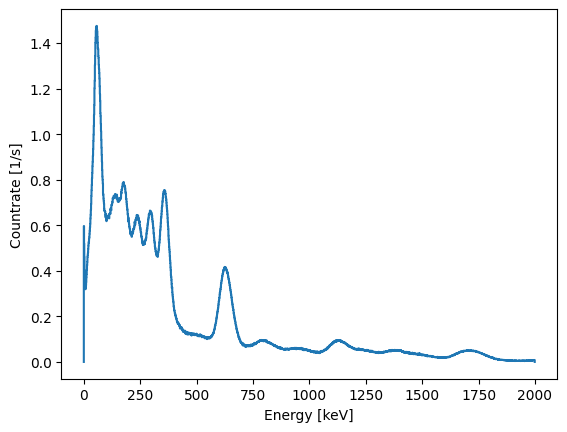

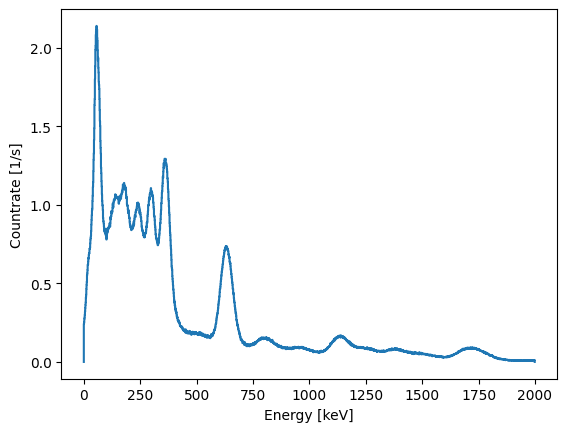

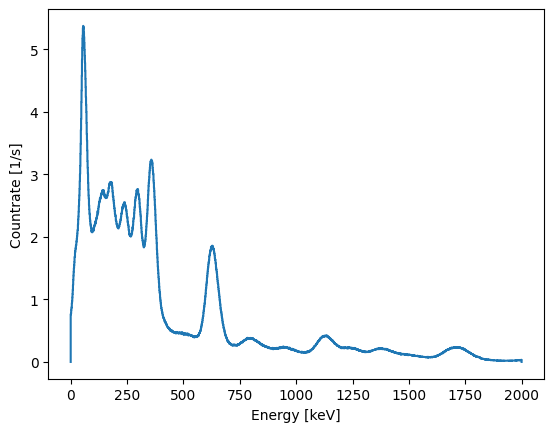

In [2]:
soil_low = utils.get_corrected_spectrum("soil_tailing11")
soil_medium = utils.get_corrected_spectrum("soil_tailing3")
soil_high = utils.get_corrected_spectrum("soil_openpit")

soil_low.plot()
soil_medium.plot()
soil_high.plot()



281.0911900540251


/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/fitting.py:987: FittingWarning: `lmfit` error estimates are unreliable. `minuit` is recommended where possible
  warnings.warn(


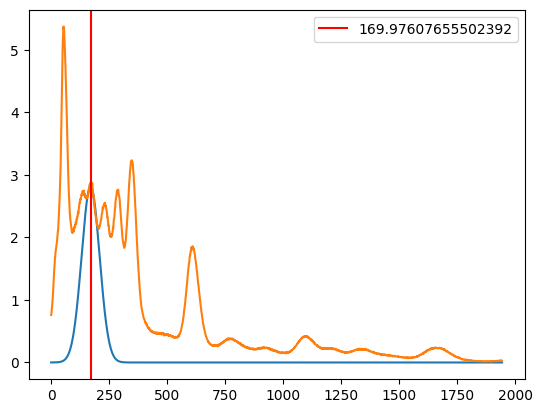

{'gauss_amp': np.float64(281.09260996981726), 'gauss_mu': np.float64(175.0), 'gauss_sigma': np.float64(39.75225098586083)}


In [116]:
peak_to_search = 186
peak_to_search *= 627/609
cps_soil_high, fitter_soil_high = utils.get_cps_peak(soil_high, peak_to_search)
print(cps_soil_high)
x_plot = np.linspace(0, 2000, 2000)
gaussian_params = fitter_soil_high.best_values
# y_plot = fitter_soil_high.model.components[0].eval(x_plot, **gaussian_params)
y_plot = fitter_soil_high.eval(x_plot, **gaussian_params)
x_plot = x_plot * 609 / 627  #*662/627
plt.plot(x_plot, y_plot)
plt.plot(x_plot[:-1], soil_high.cps_vals)
centerline = gaussian_params['gauss_mu'] * 609 / 627  #*662/627
plt.axvline(x=centerline, color='r', label=f'{centerline}')
plt.legend()
plt.show()

print(gaussian_params)

In [ ]:
# calibration!
point_source = utils.get_corrected_spectrum("energy_calibration")

# get cps under specific peaks: 662, 1173, 1333
print("Start geometric efficiency calibration...")
manifest = utils.read_manifest()  # dict of bottle info
efficiencies = utils.read_efficiencies()  # dict of efficiencies

peaks = [60, 662, 1173, 1333]
``````````````
for peak in peaks:
    cps, _ = utils.get_cps_peak(point_source, peak)
    if peak == 60:
        cps *= 0.36
    overall_efficiency = cps / gamma_info[gamma_info['energy'] == peak]['activity_cps'].values[0]
    geometric_efficiency = efficiencies[peak]
    intrinsic_efficiency = overall_efficiency / geometric_efficiency

print(geometry_efficiency)


/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/rebin.py:57: RebinWarning: The last input edge is smaller than the last output edge, zeros will padded on the right side of the new spectrum
  warnings.warn(
/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/spectrum.py:837: SpectrumWarning: Subtraction of counts-based specta, spectra have been converted to CPS
  warnings.warn(


/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/rebin.py:57: RebinWarning: The last input edge is smaller than the last output edge, zeros will padded on the right side of the new spectrum
  warnings.warn(
/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/spectrum.py:837: SpectrumWarning: Subtraction of counts-based specta, spectra have been converted to CPS
  warnings.warn(


<Axes: xlabel='Energy [keV]', ylabel='Countrate [1/s]'>

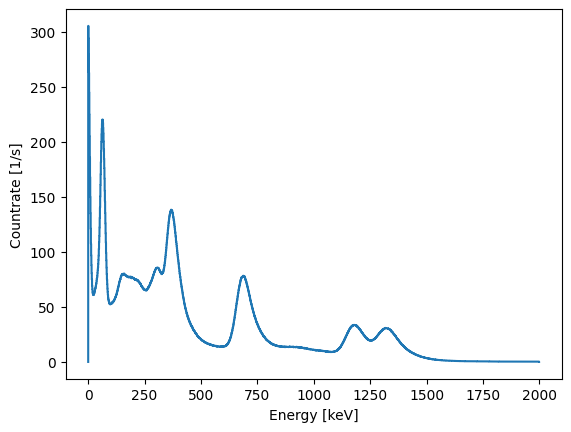

In [2]:
point_source = utils.get_corrected_spectrum("energy_calibration")
point_source.plot()

6719.9459157592455


/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/fitting.py:987: FittingWarning: `lmfit` error estimates are unreliable. `minuit` is recommended where possible
  warnings.warn(


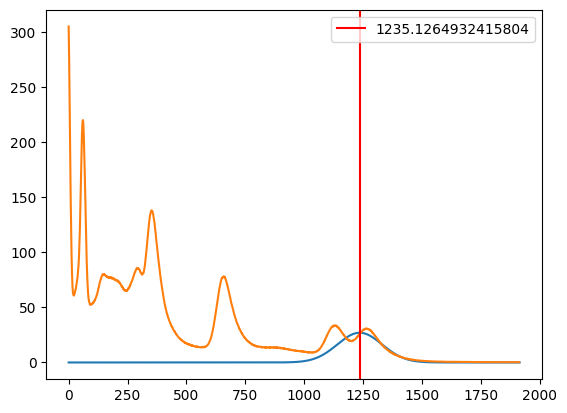

{'gauss_amp': np.float64(6719.9459157625315), 'gauss_mu': np.float64(1291.0989929353077), 'gauss_sigma': np.float64(99.16591569879824)}


In [62]:
peak_to_search = 81
peak_to_search *= 692/662
custom_bounds = (1200, 1500)
cps_point_source, fitter_point_source = utils.get_cps_peak(point_source, peak_to_search, custom_bounds)
print(cps_point_source)
x_plot = np.linspace(0, 2000, 2000)
gaussian_params = fitter_point_source.best_values
# y_plot = fitter_soil_high.model.components[0].eval(x_plot, **gaussian_params)
y_plot = fitter_point_source.eval(x_plot, **gaussian_params)
x_plot = x_plot * 662 / 692
plt.plot(x_plot, y_plot)
plt.plot(x_plot[:-1], point_source.cps_vals)
centerline = gaussian_params['gauss_mu']  * 662 / 692
plt.axvline(x=centerline, color='r', label=f'{centerline}')
plt.legend()
plt.show()

print(gaussian_params)

/tmp/ipykernel_361714/2105984851.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


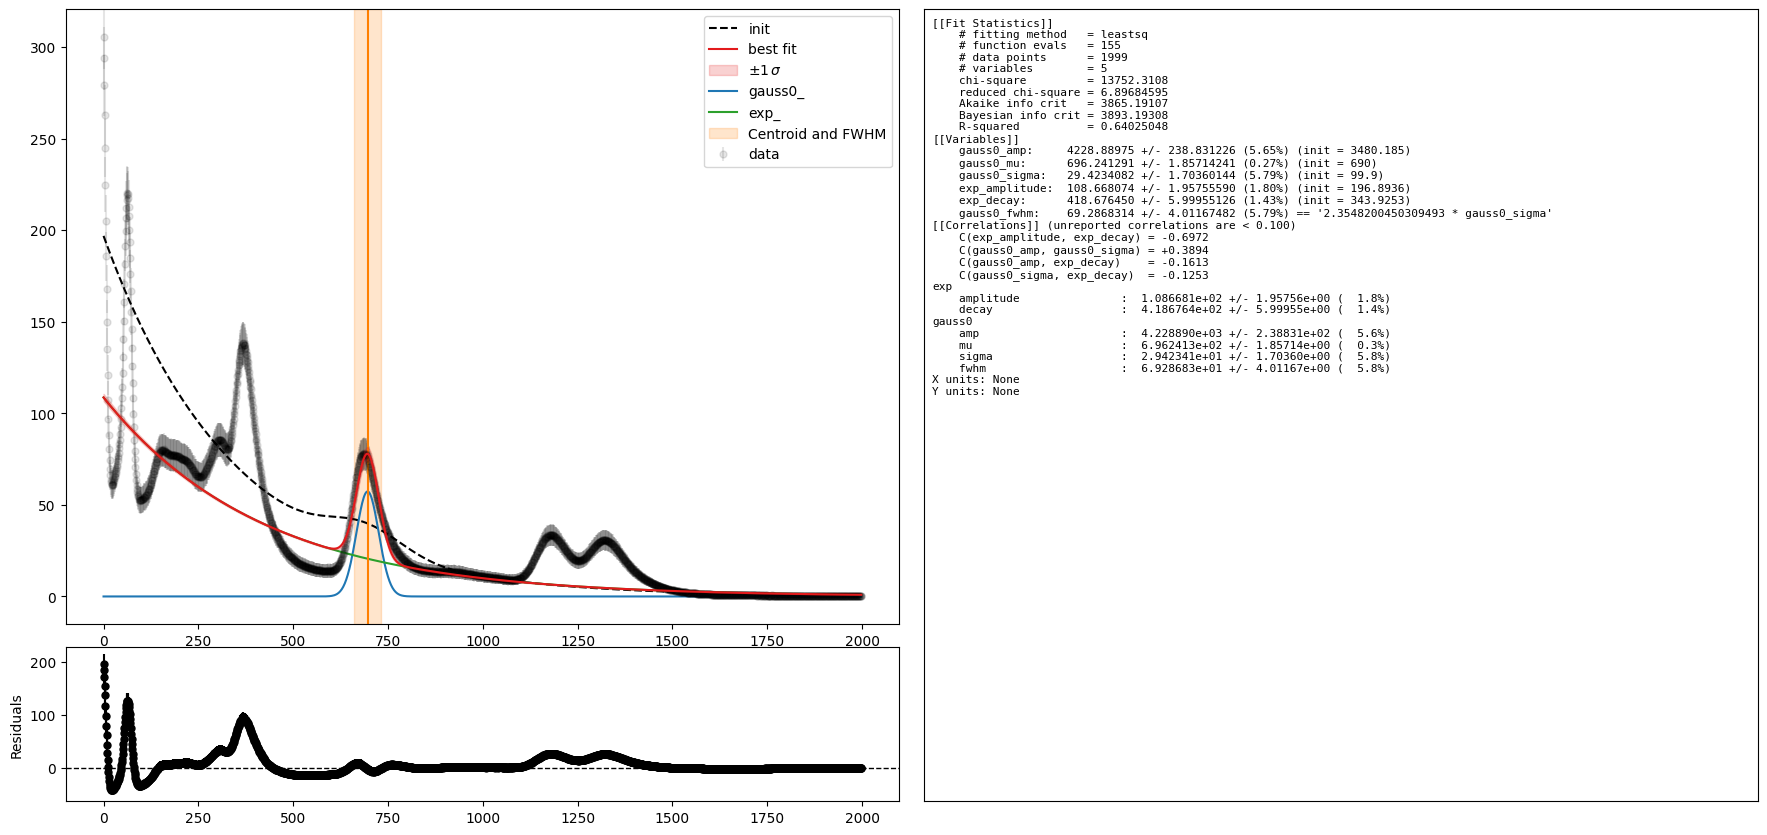

In [65]:

model = (
    bq.fitting.GaussModel(prefix="gauss0_")
    # + bq.fitting.GaussModel(prefix="gauss1_")
    # + lmfit.models.LinearModel(prefix="line_")
    +lmfit.models.ExponentialModel(prefix="exp_")
)

cps_values = point_source.cps_vals
# print(cps_values)
cps_values = np.maximum(cps_values, 0)
spectrum_1s = bq.Spectrum(cps_values)
# roi = (0,200)

fitter = bq.Fitter(model, x=spectrum_1s.bin_indices,
                   y=spectrum_1s.counts_vals,
                   y_unc=spectrum_1s.counts_uncs,
                #    roi=roi,
                   )
fitter.params["gauss0_mu"].set(value=690)
# fitter.params["gauss0_sigma"].set(value=15)
# fitter.params["gauss0_amp"].set(value=80)
# fitter.params["gauss1_mu"].set(value=1333)
# fitter.params["gauss1_sigma"].set(value=25)
# fitter.params["gauss1_amp"].set(value=140)
fitter.fit()
fitter.custom_plot()
plt.tight_layout()
plt.show()

# params = {
#     "gauss0_amp": 40,
#     "gauss0_mu": 1175,
#     "gauss0_sigma": 15.0,
#     "gauss1_amp": 35,
#     "gauss1_mu": 1333,
#     "gauss1_sigma": 15.0,
#     "line_slope": -10.0,
#     "line_intercept": 1e4,
# }

# x_data = np.arange(0, 200)
# y_data = np.random.poisson(model.eval(x=x_data, **params))

# plt.figure()
# plt.step(x_data, y_data, where="mid")
# plt.show()



In [63]:
fitter.calc_area_and_unc("gauss0").nominal_value

/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/fitting.py:987: FittingWarning: `lmfit` error estimates are unreliable. `minuit` is recommended where possible
  warnings.warn(


3673.669415637059

In [41]:
fitter.params

name,value,initial value,min,max,vary,expression
gauss0_amp,3480.18542,3480.1854155117426,0.00000000,inf,True,
gauss0_mu,690.000000,690,0.00000000,1998.00000,True,
gauss0_sigma,99.9000000,99.9,0.00000000,inf,True,
line_slope,-0.04950777,-0.04950776780753875,-inf,inf,True,
line_intercept,80.9438867,80.9438866994946,-inf,inf,True,
gauss0_fwhm,235.246522,None,-inf,inf,False,2.3548200450309493 * gauss0_sigma


In [73]:
import pandas as pd
from scipy import interpolate
simulated_efficiencies = pd.read_csv("simulated_efficiencies/geometric_efficiencies_1L.csv")

geometric_efficiency_spline = interpolate.bisplrep(simulated_efficiencies['Energy (MeV)']*1000,
                                                   simulated_efficiencies['Density (g/cc)'],
                                                   simulated_efficiencies['Geometric Efficiency'])

def get_intrinsic_efficiency(energy):
    return 0.764*np.exp(-1.21E-3*energy)

def get_geometric_efficiency(energy, density):
    return interpolate.bisplev(energy, density, geometric_efficiency_spline)
    

In [165]:
# x_1 = np.linspace(0, 1000, 1000)
# plt.plot(x_1, interpolate.bisplev(x_1, .5, efficiency_spline))
# x_2 = np.linspace(.1, 3, 5)
# plt.plot(x_2, get_geometric_efficiency(662, x_2))
get_geometric_efficiency(1764, 1.76)


np.float64(0.44438369714474424)

In [167]:
import pandas as pd
from scipy import interpolate
measured_efficiencies = pd.read_csv("simulated_efficiencies/measured_geom_efficiencies.csv")

measured_efficiency_spline = interpolate.bisplrep(measured_efficiencies['Energy (MeV)']*1000,
                                                  measured_efficiencies['Density (g/cc)'],
                                                  measured_efficiencies['Geometric Efficiency'])

def get_intrinsic_efficiency(energy):
    return 0.764*np.exp(-1.21E-3*energy)

def get_measured_geometric_efficiency(energy, density):
    return interpolate.bisplev(energy, density, measured_efficiency_spline)
    

In [ ]:
# energy = 1764
density = 1.42
energies = [186.2,
            239,
            295,
            352,
            609,
            768.4,
            1120,
            1460.8,
            1764]
for energy in energies:
    print('--------------------------------')
    print(f"{energy}:")
    print(get_geometric_efficiency(energy, density))
    print(get_measured_geometric_efficiency(energy, density))

0.4435239631313824
0.4755072506316089


/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/rebin.py:57: RebinWarning: The last input edge is smaller than the last output edge, zeros will padded on the right side of the new spectrum
  warnings.warn(
/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/spectrum.py:837: SpectrumWarning: Subtraction of counts-based specta, spectra have been converted to CPS
  warnings.warn(


<Axes: xlabel='Energy [keV]', ylabel='Countrate [1/s]'>

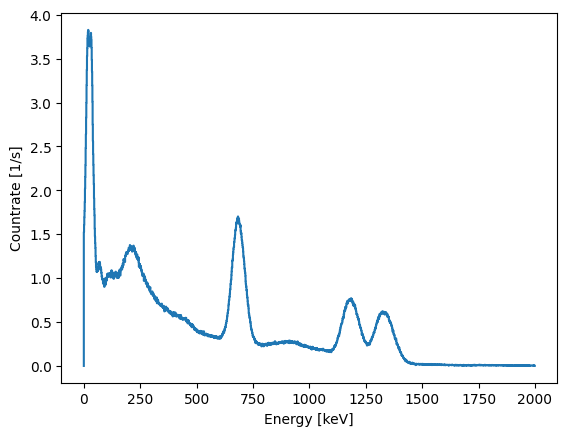

In [111]:
# 2275411
bottle = utils.get_corrected_spectrum("serial_2275411")
bottle.plot()


/tmp/ipykernel_361714/3444809905.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


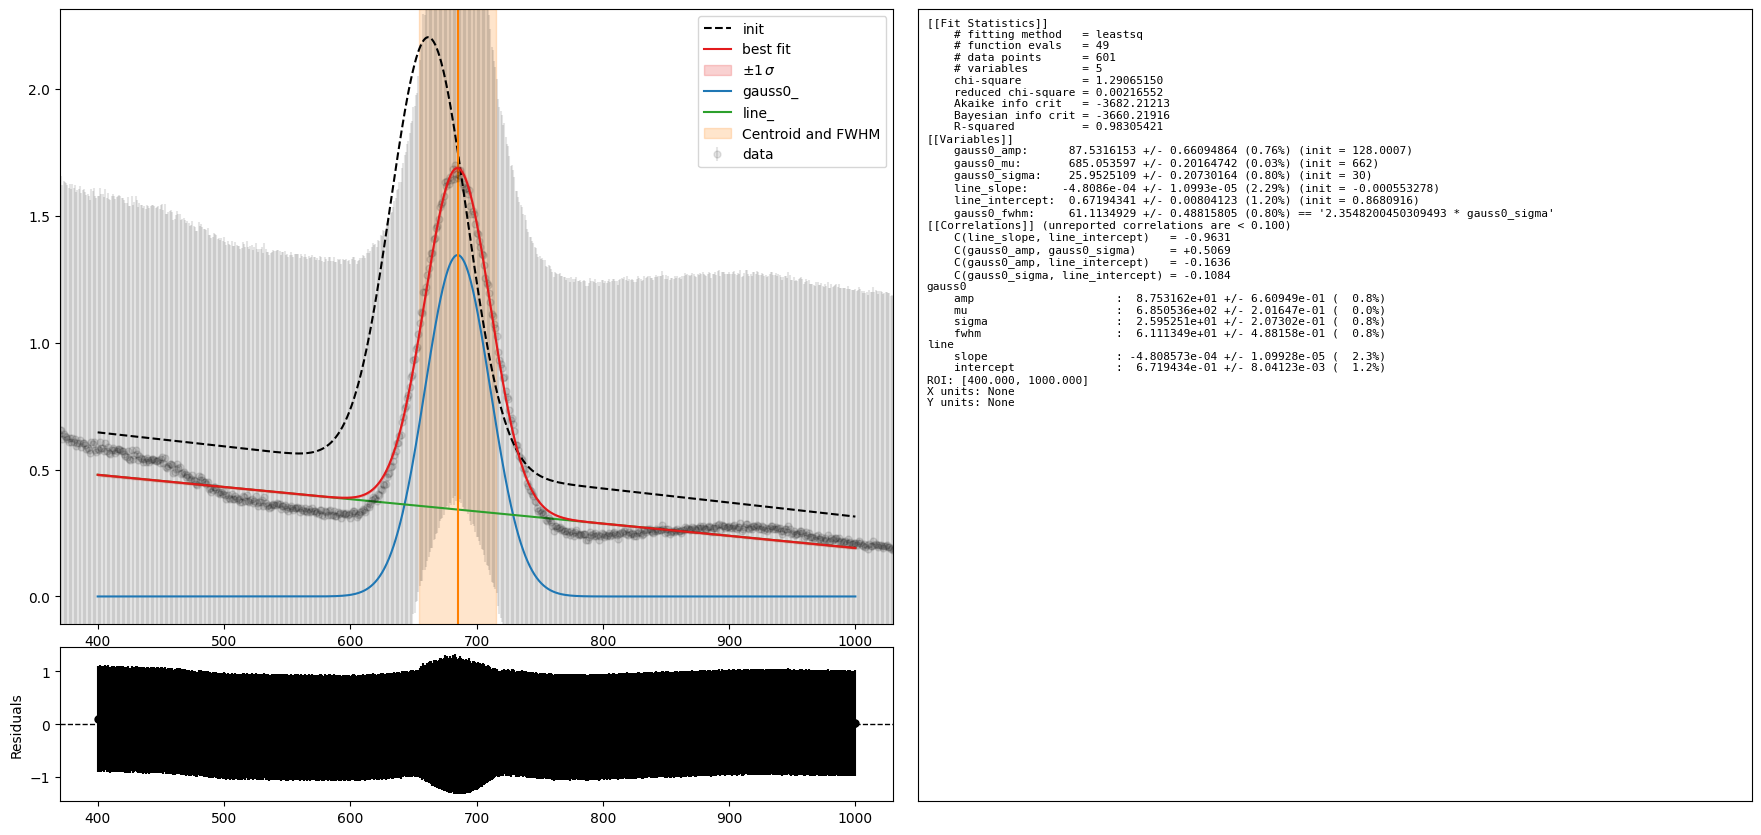

0.0925+/-0.0007
946.2011496147476


/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/fitting.py:987: FittingWarning: `lmfit` error estimates are unreliable. `minuit` is recommended where possible
  warnings.warn(


In [130]:
model = (
    bq.fitting.GaussModel(prefix="gauss0_")
    # + bq.fitting.GaussModel(prefix="gauss1_")
    + lmfit.models.LinearModel(prefix="line_")
    # +lmfit.models.ExponentialModel(prefix="exp_")
)

cps_values = bottle.cps_vals
# print(cps_values)
cps_values = np.maximum(cps_values, 0)
spectrum_1s = bq.Spectrum(cps_values)
roi = (400,1000)
# roi = (1100,1450)

fitter = bq.Fitter(model, x=spectrum_1s.bin_indices,
                   y=spectrum_1s.counts_vals,
                   y_unc=spectrum_1s.counts_uncs,
                   roi=roi,
                   )
fitter.params["gauss0_mu"].set(value=662)
# fitter.params["gauss0_sigma"].set(value=15)
# fitter.params["gauss0_amp"].set(value=80)
# fitter.params["gauss1_mu"].set(value=1333)
# fitter.params["gauss1_sigma"].set(value=25)
# fitter.params["gauss1_amp"].set(value=140)
fitter.fit()
fitter.custom_plot()
plt.tight_layout()
plt.show()
print(fitter.calc_area_and_unc('gauss0') / np.sum(cps_values))
print(np.sum(cps_values))

/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/rebin.py:57: RebinWarning: The last input edge is smaller than the last output edge, zeros will padded on the right side of the new spectrum
  warnings.warn(


<Axes: xlabel='Energy [keV]', ylabel='Counts'>

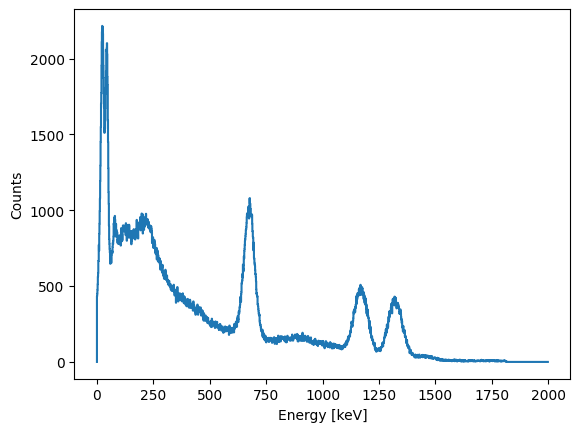

In [108]:
paths = utils.get_n42_paths("serial_2275411")
paths[0]
single_spectrum = utils.read_n42(paths[0])
single_spectrum.plot()

/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/fitting.py:567: UserWarning: Negative or zero uncertainty not supported. Changing them to 1.525648828974588. If you have Poisson data, this should be 1.
  warnings.warn(
/tmp/ipykernel_361714/4138622971.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


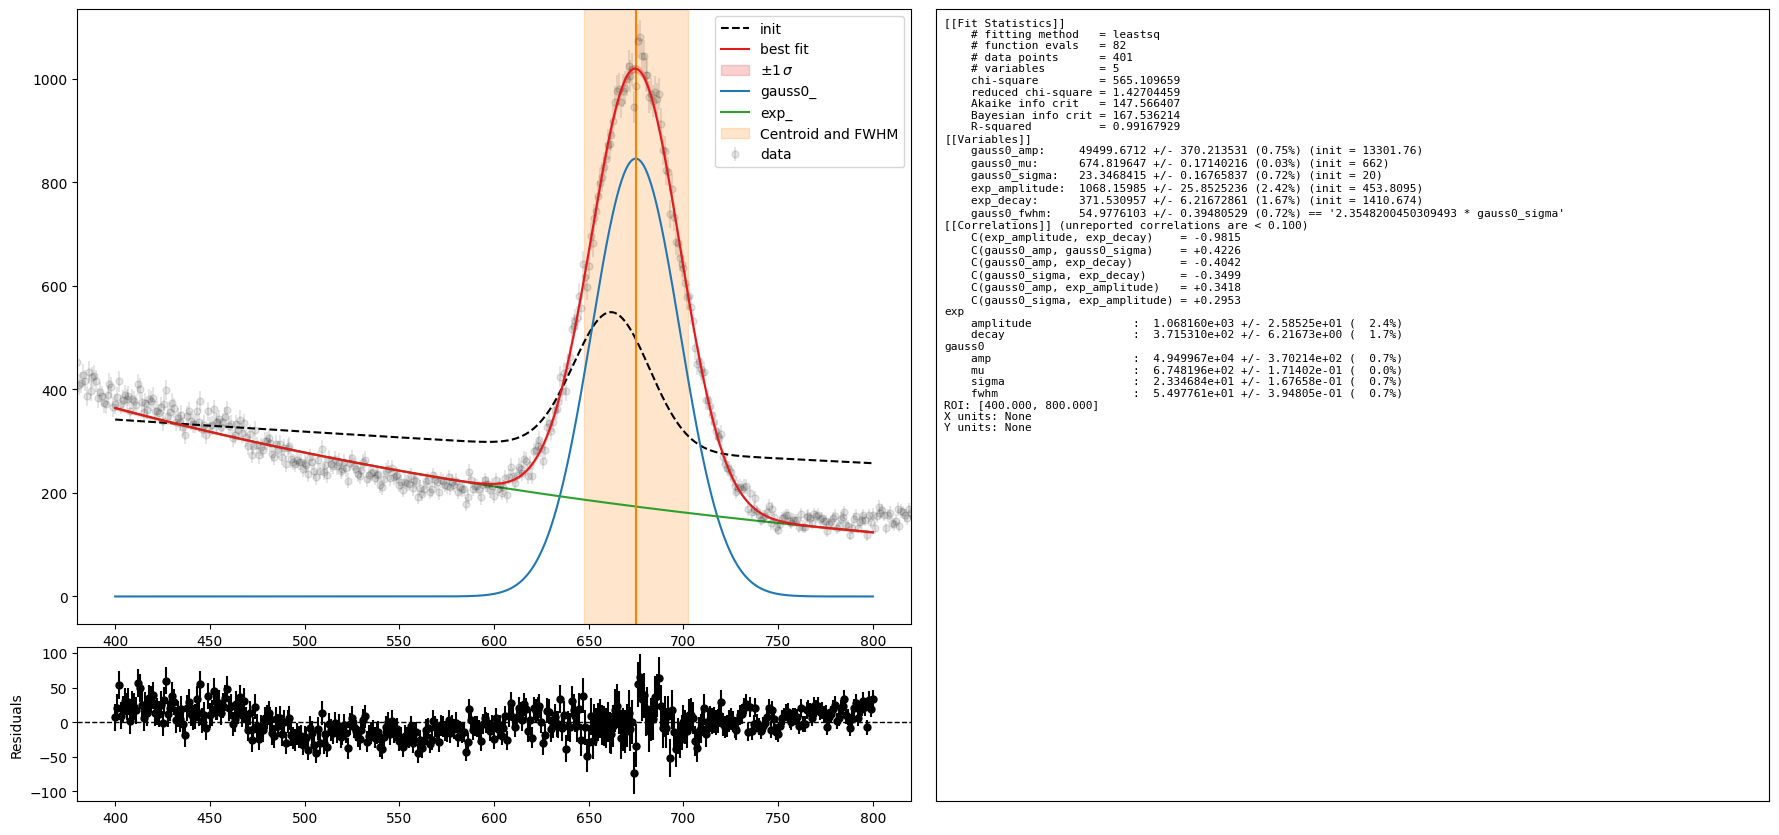

660+/-5


/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/fitting.py:987: FittingWarning: `lmfit` error estimates are unreliable. `minuit` is recommended where possible
  warnings.warn(


In [125]:
model = (
    bq.fitting.GaussModel(prefix="gauss0_")
    # + bq.fitting.GaussModel(prefix="gauss1_")
    # + lmfit.models.LinearModel(prefix="line_")
    +lmfit.models.ExponentialModel(prefix="exp_")
)


roi = (400,800)

fitter = bq.Fitter(model, x=single_spectrum.bin_indices,
                   y=single_spectrum.counts_vals,
                   y_unc=single_spectrum.counts_uncs,
                   roi=roi,
                   )
fitter.params["gauss0_mu"].set(value=662)
# fitter.params["gauss0_sigma"].set(value=15)
# fitter.params["gauss0_amp"].set(value=80)
# fitter.params["gauss1_mu"].set(value=1333)
# fitter.params["gauss1_sigma"].set(value=25)
# fitter.params["gauss1_amp"].set(value=140)
fitter.fit()
fitter.custom_plot()
plt.tight_layout()
plt.show()
print(fitter.calc_area_and_unc('gauss0') *8 / 600)